In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df1=pd.read_csv('calories.csv')
df1.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [19]:
df2=pd.read_csv('exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


or df=pd.concat(df1, df2['Calories'], axis=1)

In [20]:
df=df1.merge(df2,on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [22]:
df.shape

(15000, 9)

In [23]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: xlabel='Calories', ylabel='Count'>

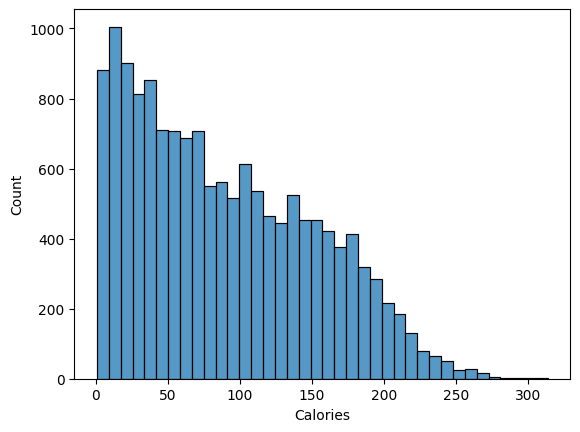

In [24]:
sns.histplot(df['Calories'])

<Axes: >

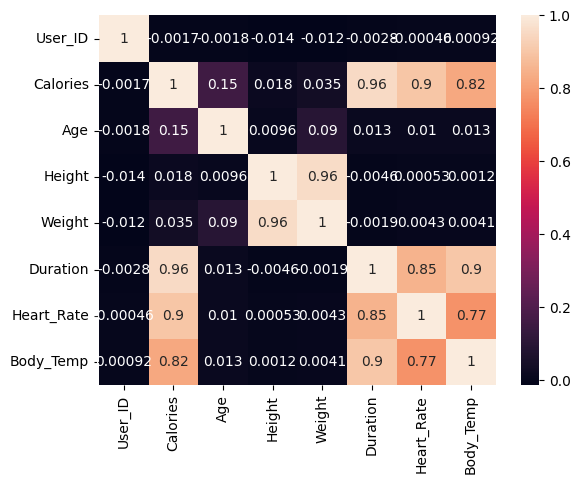

In [25]:
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
labels=la.fit_transform(df['Gender'])
df['Gender']=labels
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,0,27,154.0,58.0,10.0,81.0,39.8


In [27]:
x=df.drop(['Calories'],axis=1)
y=df['Calories']

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)

In [29]:
#randome forest input?
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=2)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)


In [30]:
print(xtest, xtest.shape)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
13400       1   40   183.0    84.0       5.0        79.0       39.1
9809        0   59   170.0    70.0       3.0        80.0       38.6
9584        0   27   164.0    59.0       4.0        86.0       39.1
5993        1   21   195.0    98.0      13.0        85.0       40.1
12738       1   24   194.0   100.0       2.0        81.0       38.0
...       ...  ...     ...     ...       ...         ...        ...
7386        1   26   194.0    96.0      12.0        90.0       40.2
13970       1   61   178.0    80.0      28.0       111.0       41.0
13872       0   24   152.0    49.0      27.0       101.0       40.9
13836       1   26   189.0    91.0       8.0        94.0       39.5
12249       0   25   165.0    66.0      24.0       104.0       40.6

[3000 rows x 7 columns] (3000, 7)


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score
print('MAE:',mean_absolute_error(ytest,ypred))
print('R2:',r2_score(ytest,ypred))


MAE: 2.322780899364615
R2: 0.9968580054915047


In [32]:
import pickle

pickle.dump(rf, open('model.pkl','wb'))
